In [ ]:
import requests

In [ ]:
subscription_key = 'bc36e4750ec344ddb4006ce743ffe1aa'
# 생성된 키 값을 복사해서 가져옴 

In [ ]:
endpoint = 'https://labuser20vision.cognitiveservices.azure.com/vision/v2.0/'
# 생성된 엔드포인트도 동일하게 복사 + vision/v2.0/ (버전이 2.0, 비전을 볼것임)

In [ ]:
analyze_url = endpoint + 'analyze'

In [ ]:
# 보라매공원 이미지
image_url = 'https://www.seouldanurim.net/comm/getImage?srvcId=MEDIA&parentSn=41987&fileTy=MEDIA&fileNo=1&thumbTy=L'

In [ ]:
from PIL import Image
from io import BytesIO

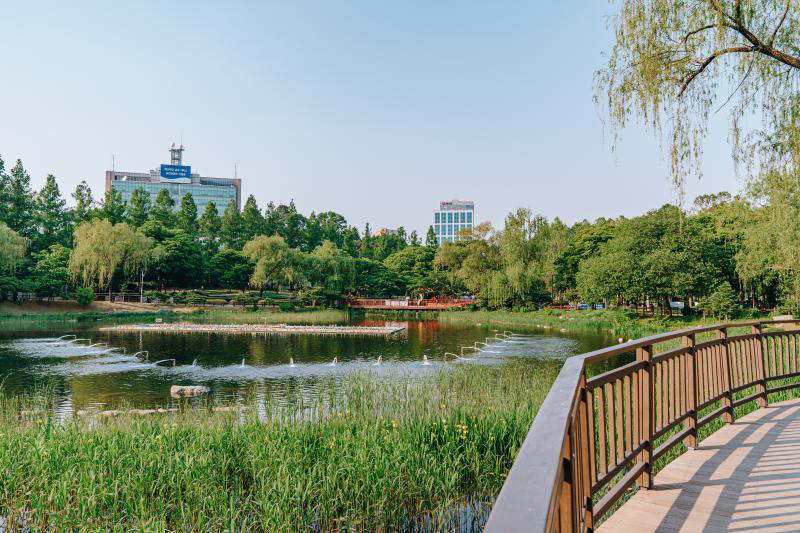

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))

image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [ ]:
response = requests.post(analyze_url, headers=headers, params=params, json=data)

In [ ]:
result = response.json()

result

{'categories': [{'name': 'outdoor_',
   'score': 0.015625,
   'detail': {'landmarks': []}},
  {'name': 'outdoor_waterside',
   'score': 0.71484375,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'White',
  'dominantColorBackground': 'Green',
  'dominantColors': ['White', 'Green'],
  'accentColor': '67482E',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['outdoor',
   'water',
   'river',
   'grass',
   'bridge',
   'fence',
   'lake',
   'train',
   'bench',
   'park',
   'body',
   'building',
   'green',
   'background',
   'sitting',
   'surrounded',
   'track',
   'large',
   'city',
   'traveling',
   'pond',
   'bushes'],
  'captions': [{'text': 'a bridge over a body of water',
    'confidence': 0.9569188781623647}]},
 'requestId': '4c22a012-09d0-4232-a1a9-41b19bd7e97b',
 'metadata': {'height': 533, 'width': 800, 'format': 'Jpeg'}}

In [ ]:
result['description']['captions'][0]['text']

'a bridge over a body of water'

In [ ]:
# 개와 고양이 이미지
image_url = 'https://images.mypetlife.co.kr/content/uploads/2019/08/09153216/pets-3715733_1920.jpg'

In [ ]:
# object detect 용 엔드포인트
detect_url = endpoint + 'detect'

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
data = {'url': image_url}

In [ ]:
response = requests.post(detect_url, headers=headers, json=data)

In [ ]:
result = response.json()
result

{'objects': [{'rectangle': {'x': 862, 'y': 389, 'w': 448, 'h': 795},
   'object': 'corgi',
   'confidence': 0.817,
   'parent': {'object': 'dog',
    'confidence': 0.858,
    'parent': {'object': 'mammal',
     'confidence': 0.875,
     'parent': {'object': 'animal', 'confidence': 0.876}}}},
  {'rectangle': {'x': 263, 'y': 650, 'w': 304, 'h': 546},
   'object': 'dog',
   'confidence': 0.647,
   'parent': {'object': 'mammal',
    'confidence': 0.815,
    'parent': {'object': 'animal', 'confidence': 0.816}}},
  {'rectangle': {'x': 475, 'y': 495, 'w': 396, 'h': 696},
   'object': 'poodle',
   'confidence': 0.555,
   'parent': {'object': 'dog',
    'confidence': 0.685,
    'parent': {'object': 'mammal',
     'confidence': 0.778,
     'parent': {'object': 'animal', 'confidence': 0.782}}}},
  {'rectangle': {'x': 1285, 'y': 819, 'w': 457, 'h': 382},
   'object': 'cat',
   'confidence': 0.671,
   'parent': {'object': 'mammal',
    'confidence': 0.817,
    'parent': {'object': 'animal', 'confid

In [ ]:
# 이미지를 다루기 위한 패키지 임포트
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [ ]:
# json 파일 읽는 법
def DrawRectangle(detectResult):
  objects = detectResult['objects']
  
  for obj in objects:
    print(obj)

    rect = obj['rectangle']
    x = rect['x']
    y = rect['y']
    w = rect['w']
    h = rect['h']
    draw.rectangle(((x,y), (x+w, y+h)), outline='red')

    # Object name
    objectName = obj['object']
    draw.text((x,y), objectName, fill='red')

In [ ]:
DrawRectangle(result)

{'rectangle': {'x': 862, 'y': 389, 'w': 448, 'h': 795}, 'object': 'corgi', 'confidence': 0.817, 'parent': {'object': 'dog', 'confidence': 0.858, 'parent': {'object': 'mammal', 'confidence': 0.875, 'parent': {'object': 'animal', 'confidence': 0.876}}}}
{'rectangle': {'x': 263, 'y': 650, 'w': 304, 'h': 546}, 'object': 'dog', 'confidence': 0.647, 'parent': {'object': 'mammal', 'confidence': 0.815, 'parent': {'object': 'animal', 'confidence': 0.816}}}
{'rectangle': {'x': 475, 'y': 495, 'w': 396, 'h': 696}, 'object': 'poodle', 'confidence': 0.555, 'parent': {'object': 'dog', 'confidence': 0.685, 'parent': {'object': 'mammal', 'confidence': 0.778, 'parent': {'object': 'animal', 'confidence': 0.782}}}}
{'rectangle': {'x': 1285, 'y': 819, 'w': 457, 'h': 382}, 'object': 'cat', 'confidence': 0.671, 'parent': {'object': 'mammal', 'confidence': 0.817, 'parent': {'object': 'animal', 'confidence': 0.818}}}


In [ ]:
image

Output hidden; open in https://colab.research.google.com to view.